# Environment Set Up

Load in the necessary libraries

In [111]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import seaborn as sns
sns.set_palette('Set2')
sns.set_style(style = 'darkgrid')
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

Load in the data structure, found on Kaggle

In [112]:
df = pd.read_csv('Crime Data Set_Baltimore.csv')

Data Overview:

In [113]:
df.shape

(264496, 14)

In [114]:
df.columns

Index(['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description',
       'Weapon', 'Post', 'District', 'Neighborhood', 'Longitude', 'Latitude',
       'Location 1', 'Premise', 'Total Incidents'],
      dtype='object')

In [115]:
df.describe()

,Post,Longitude,Latitude,Total Incidents
count,264277.000000,262385.000000,262385.000000,264496.0
mean,506.065431,-76.617411,39.307452,1.0
std,260.562958,0.042294,0.029549,0.0
min,2.000000,-76.711620,39.200410,1.0
25%,243.000000,-76.648450,39.288380,1.0
50%,511.000000,-76.613950,39.303670,1.0
75%,731.000000,-76.587410,39.327950,1.0
max,945.000000,-76.528500,39.372930,1.0


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264496 entries, 0 to 264495
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        264496 non-null  object 
 1   CrimeTime        264496 non-null  object 
 2   CrimeCode        264496 non-null  object 
 3   Location         262382 non-null  object 
 4   Description      254528 non-null  object 
 5   Weapon           91150 non-null   object 
 6   Post             264277 non-null  float64
 7   District         264420 non-null  object 
 8   Neighborhood     261882 non-null  object 
 9   Longitude        262385 non-null  float64
 10  Latitude         262385 non-null  float64
 11  Location 1       262385 non-null  object 
 12  Premise          254072 non-null  object 
 13  Total Incidents  264496 non-null  int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 28.3+ MB


In [117]:
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09-02-2017,23:30:00,3JK,4200 AUDREY AVE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09-02-2017,23:00:00,7A,800 NEWINGTON AVE,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09-02-2017,22:53:00,9S,600 RADNOR AV,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09-02-2017,22:50:00,4C,1800 RAMSAY ST,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09-02-2017,22:31:00,4E,100 LIGHT ST,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


# Data Cleaning

In [118]:
null_count = df.isnull().sum()
null_prop = null_count / len(df)
pd.DataFrame({
    'Count': null_count,
    'Proportion': null_prop})

,Count,Proportion
CrimeDate,0,0.000000
CrimeTime,0,0.000000
CrimeCode,0,0.000000
Location,2114,0.007993
Description,9968,0.037687
Weapon,173346,0.655382
Post,219,0.000828
District,76,0.000287
Neighborhood,2614,0.009883
Longitude,2111,0.007981


What's the deal with all of the Weapon nulls? Let's make a sole dataframe with only null values for weapons, and see what we can find.

In [119]:
df0 = df[df['Weapon'].isnull()]

C:\Users\Raj Bhuva\AppData\Local\Temp\ipykernel_30644\1265790535.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


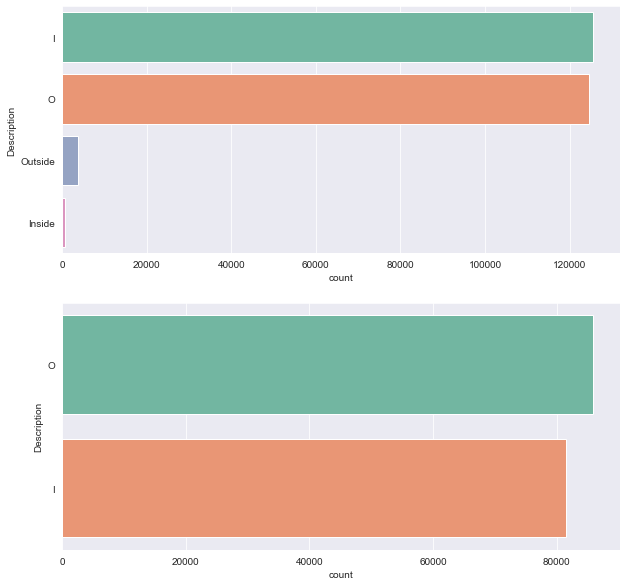

In [120]:
fig, ax = plt.subplots(2,1)
sns.countplot(y = df['Description'], ax = ax[0])
sns.countplot(y= df0['Description'], ax = ax[1])
fig.set_size_inches(10,10)
fig.show()

Comparing the two types of crime committed with weapons versus null weapons, it is reasonable to assume that null values for weapons means that there was no weapon involved. Let's replace the nulls with "NO WEAPON".

In [121]:
df['Weapon'].fillna('NO WEAPON', inplace = True)

Cleaning CrimeDate and CrimeTime

In [122]:
df['CrimeTime'] = df['CrimeTime'].str.replace('24:00:00', '00:00:00')

In [123]:
df['Date'] = df['CrimeDate'] + ' ' + df['CrimeTime']
df['Date'] = pd.to_datetime(df['Date'])

In [124]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday + 1
df['Hour'] = df['Date'].dt.hour

In [125]:
df = df.drop(['CrimeDate', 'CrimeTime'], axis = 1)

In [126]:
df = df.set_index('Date')

Cleaning Inside/Outside

In [127]:
df['Description'].value_counts()
df['Description'] = df['Description'].replace('I', 'Inside')
df['Description'] = df['Description'].replace('O', 'Outside')

# Data Visualization

Day of Month

[]

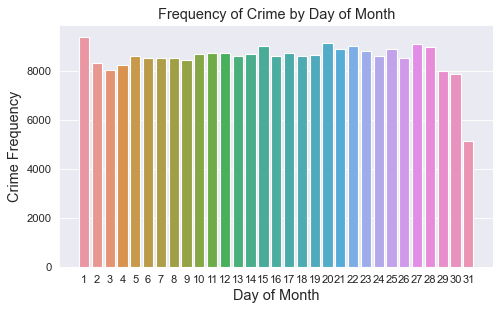

In [128]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Day of Month', fontsize=13)
ax = sns.countplot(x = 'Day', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Month', fontsize=13)
plt.plot()

Month

[]

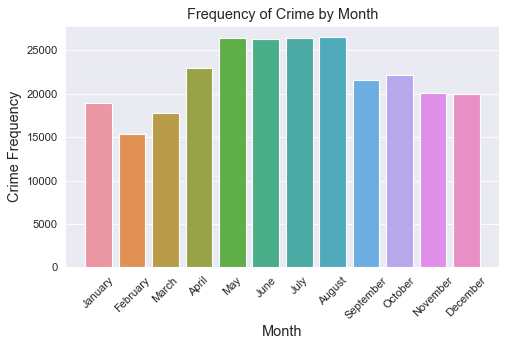

In [129]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Month', fontsize=13)
ax = sns.countplot(x = 'Month', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Month', fontsize=13)
plt.xticks(rotation = 45)
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 
ax.set_xticklabels(labels)
plt.plot()

Year

[]

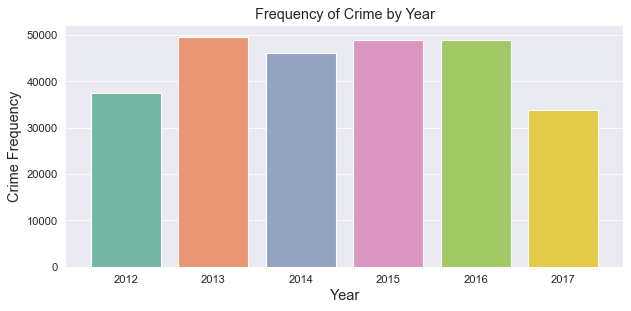

In [130]:
plt.figure(figsize=(9,4), dpi=80)

plt.title('Frequency of Crime by Year', fontsize=13)
ax = sns.countplot(x = 'Year', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Year', fontsize=13)
plt.plot()

Weekday

[]

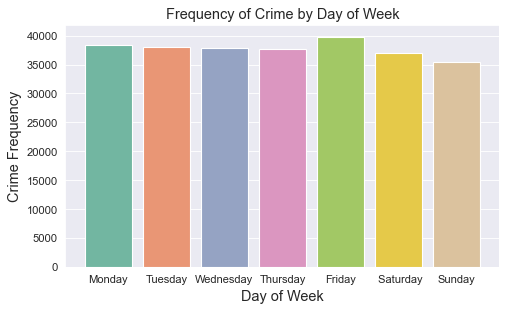

In [131]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=13)
ax = sns.countplot(x = 'Weekday', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Day of Week', fontsize=13)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

Weekday and Description (messy)

[]

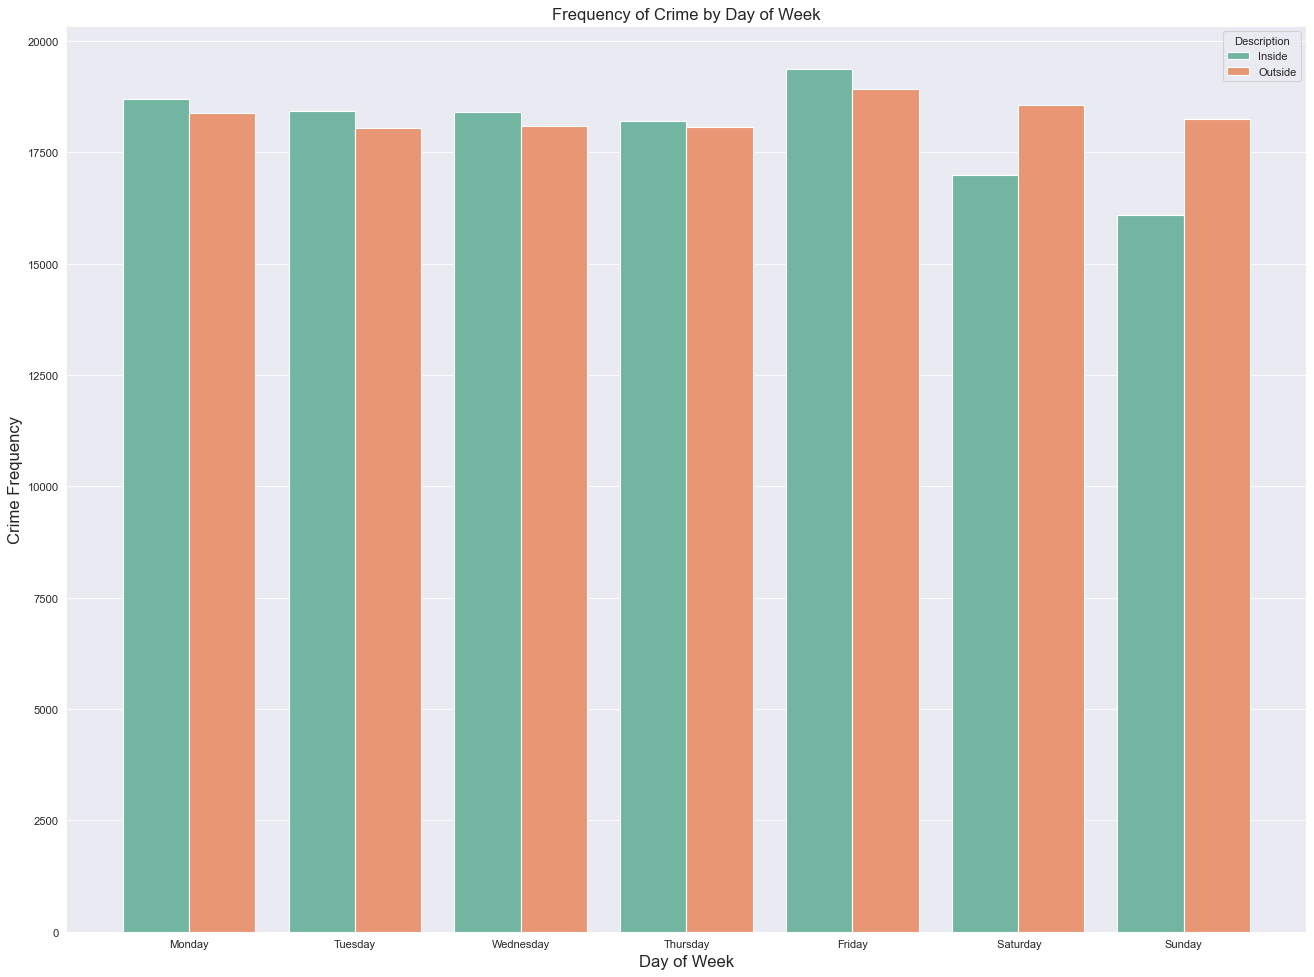

In [132]:
plt.figure(figsize=(20,15), dpi=80)

plt.title('Frequency of Crime by Day of Week', fontsize=15)
ax = sns.countplot(x = 'Weekday', hue = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=15)
plt.xlabel('Day of Week', fontsize=15)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
ax.set_xticklabels(labels)
plt.plot()

Hour of Day

[]

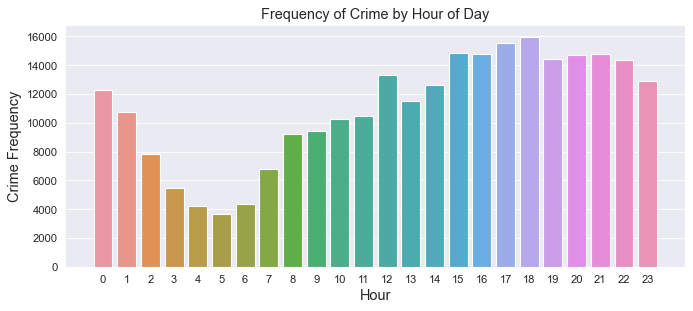

In [133]:
plt.figure(figsize=(10,4), dpi=80)

plt.title('Frequency of Crime by Hour of Day', fontsize=13)
ax = sns.countplot(x = 'Hour', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Hour', fontsize=13)
plt.plot()

Crime Description

[]

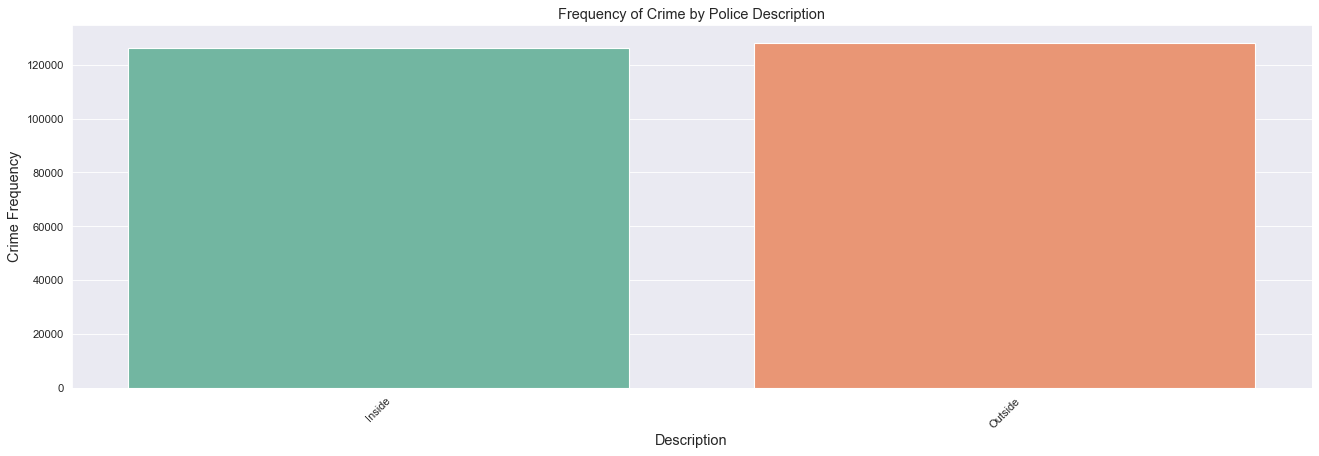

In [134]:
plt.figure(figsize=(20,6), dpi=80)

plt.title('Frequency of Crime by Police Description', fontsize=13)
ax = sns.countplot(x = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Description', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

Inside/Outside

[]

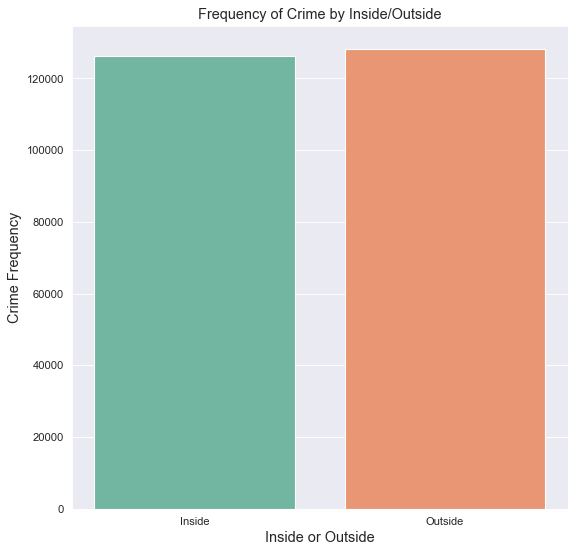

In [135]:
plt.figure(figsize=(8,8), dpi=80)

plt.title('Frequency of Crime by Inside/Outside', fontsize=13)
ax = sns.countplot(x = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Inside or Outside', fontsize=13)
plt.plot()

Weapon Used

[]

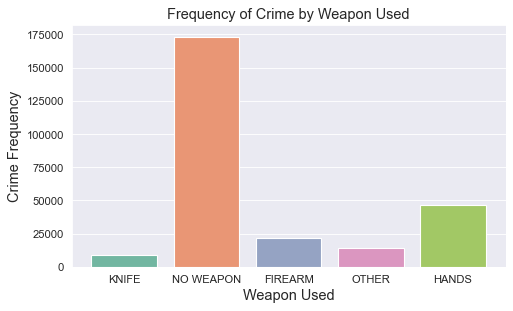

In [136]:
plt.figure(figsize=(7,4), dpi=80)

plt.title('Frequency of Crime by Weapon Used', fontsize=13)
ax = sns.countplot(x = 'Weapon', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('Weapon Used', fontsize=13)
plt.plot()

Weapon and Year

[]

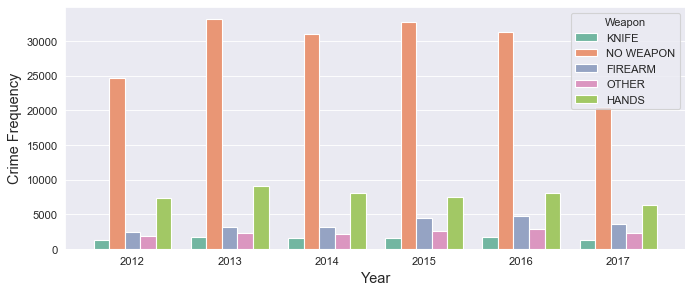

In [137]:
plt.figure(figsize = (10, 4), dpi = 80)

ax = sns.countplot(x = "Year", hue = "Weapon", data = df)
plt.ylabel("Frequency of Crime per Year Grouped by Weapon Used", fontsize = 13)
plt.ylabel("Crime Frequency", fontsize = 13)
plt.xlabel("Year", fontsize = 13)
plt.plot()

District

[]

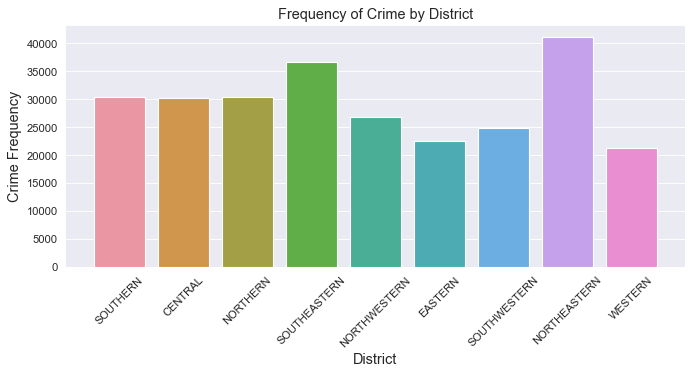

In [138]:
plt.figure(figsize=(10,4), dpi=80)

plt.title('Frequency of Crime by District', fontsize=13)
ax = sns.countplot(x = 'District', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('District', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

District and Inside/Outside

[]

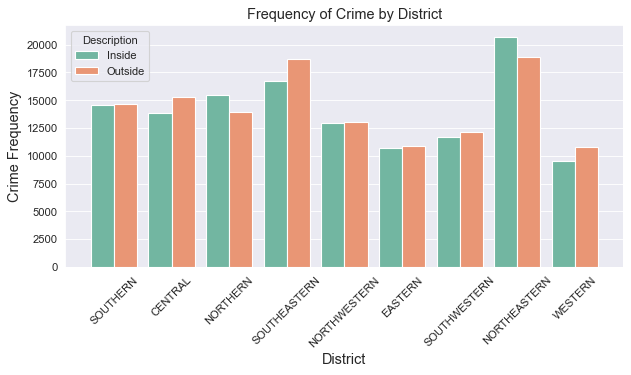

In [139]:
plt.figure(figsize=(9,4), dpi=80)

plt.title('Frequency of Crime by District', fontsize=13)
ax = sns.countplot(x = 'District', hue = 'Description', data = df)
plt.ylabel("Crime Frequency", fontsize=13)
plt.xlabel('District', fontsize=13)
plt.xticks(rotation = 45)
plt.plot()

# Folium Map

In [140]:
import folium
from folium.plugins import HeatMap

In [141]:
df = df[pd.notnull(df['Latitude'])]
df = df[pd.notnull(df['Longitude'])]

In [142]:
df['Latitude'].median()

39.30367

In [143]:
df['Longitude'].median()

-76.61395

In [144]:
def generateBaseMap(default_location = [39.30364, -76.6139599], default_zoom_start = 12):
    base_map = folium.Map(location = default_location, control_scale = True, zoom_start = default_zoom_start)
    return base_map

In [145]:
base_map = generateBaseMap()

In [146]:
df['count'] = 1

In [151]:
df_murder = df[df['Description'] == 'O']

In [152]:
HeatMap(
        data = df_murder[['Latitude', 'Longitude', 'count']].groupby(
            ['Latitude', 'Longitude']).sum().reset_index().values.tolist(),
        radius = 8,
        max_zoom = 13).add_to(base_map)
base_map